# Dealing with class imbalance

In [ ]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))


from models.logistic_regression import LogisticRegression
from evaluator.model_evaluator import ModelEvaluator
from training.crossval import CrossValidator
from preprocessing.smote import Smote

### Importing dataset

In [2]:
X_train = pd.read_csv('../dataset/X_train.csv').values
X_test = pd.read_csv('../dataset/X_test.csv').values
y_train = pd.read_csv('../dataset/y_train.csv').values.ravel()
y_test = pd.read_csv('../dataset/y_test.csv').values.ravel()

In [ ]:
smote = Smote(k_neighbours=5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### Checking class distribution of data

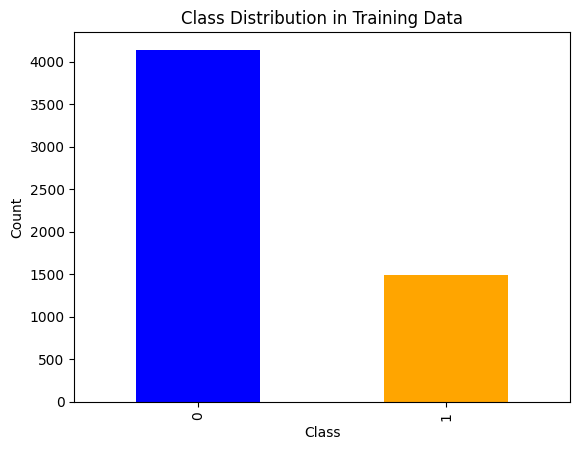

Class 0 count: 4138
Class 1 count: 1497


In [3]:
class_counts = pd.Series(y_train).value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])

In [ ]:
smote = Smote(k_neighbours=5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Text(0, 0.5, 'Count')

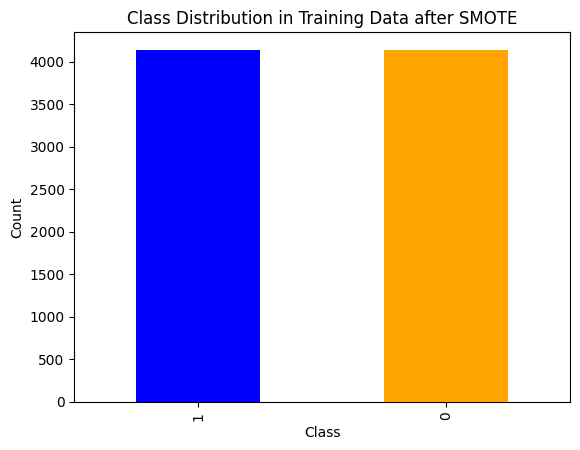

In [5]:
class_counts = pd.Series(y_train_resampled).value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution in Training Data after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')


In [6]:
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_resampled: (8276, 40)
Shape of y_train_resampled: (8276,)
Shape of X_train: (5635, 40)
Shape of y_train: (5635,)


### LR model utilising no smote

##### CV

In [7]:
lr = LogisticRegression(eta=0.05, epochs=3000, lambda_reg=0.1)
lr_cv_results = CrossValidator.cross_validate(lr, X_train, y_train, folds=10, random_state=42)
print("LR Mean Metrics:", lr_cv_results['mean_metrics'])

LR Mean Metrics: {'accuracy': np.float64(0.800014697420759), 'precision': np.float64(0.6508779165674577), 'recall': np.float64(0.5338584830955139), 'f1_score': np.float64(0.5857434853078087), 'f2_score': np.float64(0.553316853543988)}


### LR model utilising smote

##### CV

In [8]:
lr = LogisticRegression(eta=0.05, epochs=3000, lambda_reg=0.1)
lr_cv_results = CrossValidator.cross_validate(lr, X_train_resampled, y_train_resampled, folds=10, random_state=42)
print("LR Mean Metrics:", lr_cv_results['mean_metrics'])

LR Mean Metrics: {'accuracy': np.float64(0.7660942006790624), 'precision': np.float64(0.7491645950142122), 'recall': np.float64(0.8007924299129139), 'f1_score': np.float64(0.7738461911668333), 'f2_score': np.float64(0.7897203610670851)}


In [9]:
lr = LogisticRegression(eta=0.05, epochs=1000, lambda_reg=0.1)
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_test)
metrics = ModelEvaluator.calculate_metrics(y_test, y_pred)
print("LR Test Metrics:", metrics)

LR Test Metrics: {'accuracy': np.float64(0.7606534090909091), 'precision': np.float64(0.5306479859894921), 'recall': np.float64(0.8145161290322581), 'f1_score': np.float64(0.6426299045599152), 'f2_score': np.float64(0.7357940747935893)}


#### TOMEK

In [ ]:

import importlib
import preprocessing.tomek
importlib.reload(preprocessing.tomek)
from preprocessing.tomek import TomekLinks



LR Test Metrics: {'accuracy': np.float64(0.8025568181818182), 'precision': np.float64(0.6186868686868687), 'recall': np.float64(0.6586021505376344), 'f1_score': np.float64(0.6380208333333335), 'f2_score': np.float64(0.6502123142250531)}


Class 0 count: 3698
Class 1 count: 1497


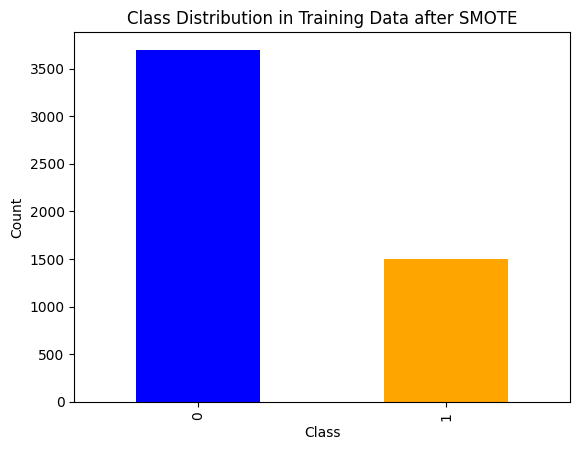

In [10]:
class_counts = pd.Series(y_train_resampled).value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution in Training Data after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])

In [ ]:
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)
lr = LogisticRegression(eta=0.05, epochs=2000, lambda_reg=0.1)
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_test)
metrics = ModelEvaluator.calculate_metrics(y_test, y_pred)
print("LR Test Metrics:", metrics)

LR Test Metrics: {'accuracy': np.float64(0.8025568181818182), 'precision': np.float64(0.6186868686868687), 'recall': np.float64(0.6586021505376344), 'f1_score': np.float64(0.6380208333333335), 'f2_score': np.float64(0.6502123142250531)}
